In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:
cd 'gdrive/My Drive/Colab Notebooks'

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5


In [ ]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid


In [ ]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids



In [ ]:

def KMeans(data,n_clusters, max_iter=100):
    X = np.array(data)
    init_centroids = random.sample(range(0, len(X)), n_clusters)
    centroids = []
    for i in init_centroids:
        centroids.append(data.loc[i])

    centroids = np.array(centroids)
    for i in range(max_iter):
        get_centroids = findClosestCentroids(centroids, X)
        centroids = calc_centroids(get_centroids, X)
        
    return centroids

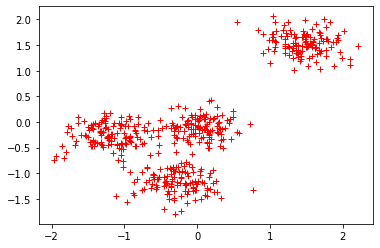

In [ ]:
data1 = pd.read_csv("Dataset1.csv")

plt.plot(data1["X"],data1["Y"],'r+')
plt.show()

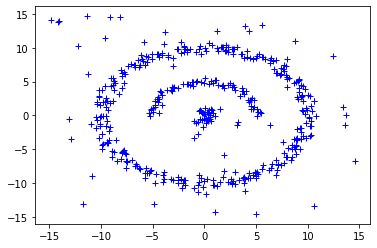

In [ ]:
data2 = pd.read_csv("Dataset2.csv")



plt.plot(data2["X"],data2["Y"],'b+')
plt.show()

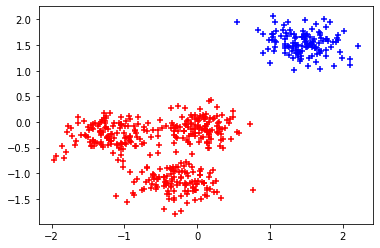

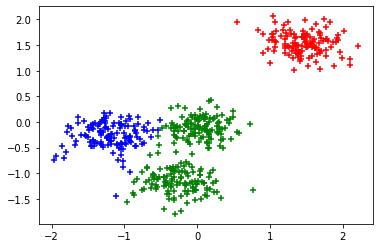

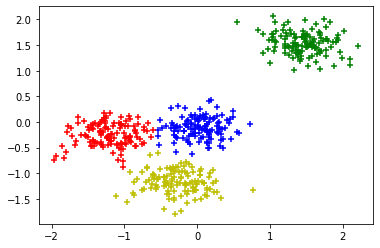

In [ ]:
clustering_error=[]
for n in range(2,5):
    c_mean_distances = []
    temp=[]
    centroids = KMeans(data1,n_clusters=n,max_iter=15)
    out = findClosestCentroids(centroids, np.array(data1))
    color =['r','b','g','y']
    for j, (cx, cy) in enumerate(centroids):
        for i in range(data1.shape[0]):
            if out[i] == j:
                temp.append(np.sqrt((data1["X"][i]-cx)**2+(data1["Y"][i]-cy)**2) )

        c_mean_distances.append(np.mean(temp))
    clustering_error.append(np.mean(c_mean_distances))

    for i in range(data1.shape[0]):
        for j in range(n):
            if out[i] == j:
                plt.scatter(data1["X"][i],data1["Y"][i],c=color[j],marker='+')
                

    plt.show()

In [ ]:
clustering_error

[0.6949776310564997, 0.3711896902769603, 0.3140122727528116]

In [ ]:
clustering_error=[]
for n in range(1,15):
    c_mean_distances = []
    temp=[]
    centroids = KMeans(data1,n_clusters=n,max_iter=15)
    out = findClosestCentroids(centroids, np.array(data1))

    for j, (cx, cy) in enumerate(centroids):
        for i in range(data1.shape[0]):
            if out[i] == j:
                temp.append(np.sqrt((data1["X"][i]-cx)**2+(data1["Y"][i]-cy)**2) )

        c_mean_distances.append(np.mean(temp))
        
    print("n=",n, c_mean_distances)
    clustering_error.append(np.mean(c_mean_distances))
    

  

n= 1 [1.236496530958413]
n= 2 [0.7491160326963786, 0.6408392294166209]
n= 3 [0.3160088195773474, 0.3346341775026478, 0.4913832583180853]
n= 4 [0.2886597397595568, 0.30638902552400693, 0.31630045732935297, 0.3162275478913516]
n= 5 [0.2568146296321549, 0.268909405919456, 0.2661775316730234, 0.28269984198612813, 0.2947131320635294]
n= 6 [0.2568146296321549, 0.2672517053702283, 0.26491841901146773, 0.2594385615420762, 0.28122619840760166, 0.27721529179243964]
n= 7 [0.24658537418880908, 0.23564916266462055, 0.24094129653086224, 0.27609254615136164, 0.2709507132951008, 0.26875334891294544, 0.2632969771868647]
n= 8 [0.2387552784057408, 0.24635778568623024, 0.2535846828008583, 0.24777842749807508, 0.24654644074565885, 0.24444771840583143, 0.2350784223409327, 0.25031132502523606]
n= 9 [0.20205521976085836, 0.28786365335761216, 0.26779489179558624, 0.25766524143757574, 0.2494910782295609, 0.24796631976399316, 0.24724655264531406, 0.2406296682574281, 0.24041223903463235]
n= 10 [0.2062296552885549

In [ ]:
print(clustering_error)

[1.236496530958413, 0.6949776310564997, 0.3806754184660268, 0.30689419262606704, 0.2738629082548584, 0.2678108009593281, 0.2574670598472235, 0.24535751011357043, 0.24901387380917342, 0.22859412649297317, 0.2290870388049254, 0.21500354781073372, 0.19714192647996365, 0.2069551244236427]


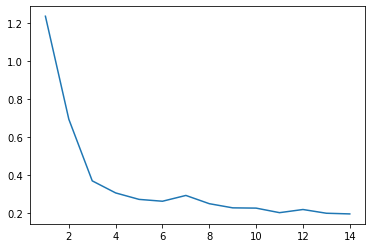

In [ ]:
plt.plot(list(range(1,15)),clustering_error)
plt.show()

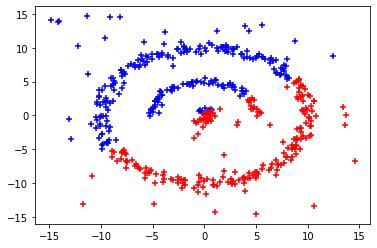

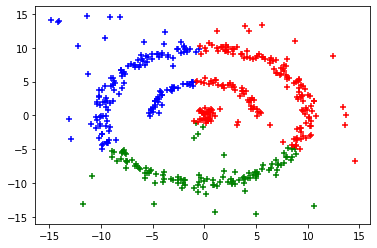

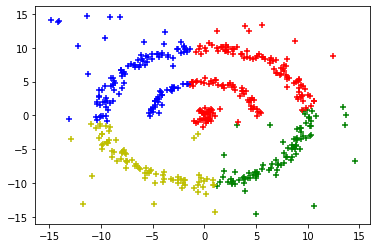

In [ ]:
clustering_error2=[]
for n in range(2,5):
    c_mean_distances = []
    temp=[]
    centroids = KMeans(data2,n_clusters=n,max_iter=15)
    out = findClosestCentroids(centroids, np.array(data2))
    color =['r','b','g','y']
    for j, (cx, cy) in enumerate(centroids):
        for i in range(data2.shape[0]):
            if out[i] == j:
                temp.append(np.sqrt((data2["X"][i]-cx)**2+(data2["Y"][i]-cy)**2) )

        c_mean_distances.append(np.mean(temp))
    clustering_error2.append(np.mean(c_mean_distances))

    for i in range(data2.shape[0]):
        for j in range(n):
            if out[i] == j:
                plt.scatter(data2["X"][i],data2["Y"][i],c=color[j],marker='+')
                

    plt.show()

In [ ]:
clustering_error2=[]
for n in range(1,15):
    c_mean_distances = []
    temp=[]
    centroids = KMeans(data2,n_clusters=n,max_iter=15)
    out = findClosestCentroids(centroids, np.array(data2))

    for j, (cx, cy) in enumerate(centroids):
        for i in range(data2.shape[0]):
            if out[i] == j:
                temp.append(np.sqrt((data2["X"][i]-cx)**2+(data2["Y"][i]-cy)**2) )

        c_mean_distances.append(np.mean(temp))
        
    print("n=",n, c_mean_distances)
    clustering_error2.append(np.mean(c_mean_distances))

n= 1 [8.658345154205232]
n= 2 [7.082377415181884, 6.839597050445585]
n= 3 [5.278131369297902, 5.413669641273024, 5.429645122532548]
n= 4 [5.576434671725654, 4.961435067431578, 4.761610305576215, 4.692042642609573]
n= 5 [3.9951845109892195, 4.173635932770668, 3.80094802274142, 3.885617858884577, 4.001688245640097]
n= 6 [3.4696776140467573, 3.6996903768838583, 3.438817033110744, 3.4954133479100307, 3.4767543723874286, 3.4496728793770854]
n= 7 [3.1788489100361113, 3.123854487640115, 3.0860866113062095, 3.1370536380967087, 3.201642910461916, 3.1440206315962813, 3.0994098487374067]
n= 8 [2.692739324390689, 2.6056151365620286, 2.984576259036278, 2.8762322452137603, 2.8402620273184875, 2.868575272051523, 2.8984986121820433, 2.931238783413822]
n= 9 [2.7312173713346053, 2.688815325644211, 2.638965249050338, 2.565380385448598, 2.5225206970795044, 2.520946490706186, 2.5405288737194653, 2.4980598167739885, 2.586436947702157]
n= 10 [2.1933749717378017, 2.449092728047249, 2.4494759241768653, 2.67684

In [ ]:
print(clustering_error2)

[8.658345154205232, 6.960987232813734, 5.373815377701159, 4.997880671835755, 3.9714149142051967, 3.505004270619317, 3.138702433982107, 2.837217207521079, 2.588096795273229, 2.4776300527042965, 2.2323244593448175, 1.9039898533228292, 2.0774559984930616, 1.7551662928641332]


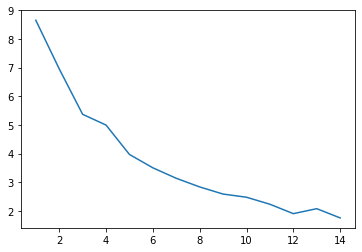

In [ ]:
plt.plot(list(range(1,15)),clustering_error2)
plt.show()